In [85]:
import json
import pandas as pd

from sqlalchemy import create_engine

import seaborn as sns
import matplotlib as plt

import calendar

#### Information on data:
- Booking data for 2 hotels 
- Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon
- Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

### Read data from SQL database

In [86]:
with open('/Users/laumaustupa/Desktop/Ironhack/Paroles/SQL.json') as cred_data:
    info = json.load(cred_data)
    
user = info['user']
pwd = info['password']

engine = create_engine('mysql+pymysql://'+ user + ':' + pwd +'@localhost/Iron_final_project')

In [87]:
data = pd.read_sql_query('SELECT * FROM Iron_final_project.df1_Hotels', engine)

### Exploring data & data vizualisation

In [88]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,Not applicable,Not applicable,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
1,0,737,2015,July,27,1,0,0,2,0.0,...,Not applicable,Not applicable,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
2,0,7,2015,July,27,1,0,1,1,0.0,...,Not applicable,Not applicable,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,Not applicable,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,Not applicable,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 32 columns):
IsCanceled                     119386 non-null int64
LeadTime                       119386 non-null int64
ArrivalDateYear                119386 non-null int64
ArrivalDateMonth               119386 non-null object
ArrivalDateWeekNumber          119386 non-null int64
ArrivalDateDayOfMonth          119386 non-null int64
StaysInWeekendNights           119386 non-null int64
StaysInWeekNights              119386 non-null int64
Adults                         119386 non-null int64
Children                       119386 non-null float64
Babies                         119386 non-null int64
Meal                           119386 non-null object
Country                        119386 non-null object
MarketSegment                  119386 non-null object
DistributionChannel            119386 non-null object
IsRepeatedGuest                119386 non-null int64
PreviousCancellations          119

In [90]:
data.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370420,104.012573,2016.156559,27.165514,15.798326,0.927579,2.500302,1.856407,0.103890,0.007790,0.031905,0.087121,0.137085,0.221090,2.321227,101.787852,0.062520,0.571374
std,0.482919,106.863861,0.707475,13.604966,8.780863,0.998579,1.908280,0.579265,0.398561,0.089334,0.175748,0.844350,1.497452,0.652284,17.595011,48.153112,0.245295,0.792806
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


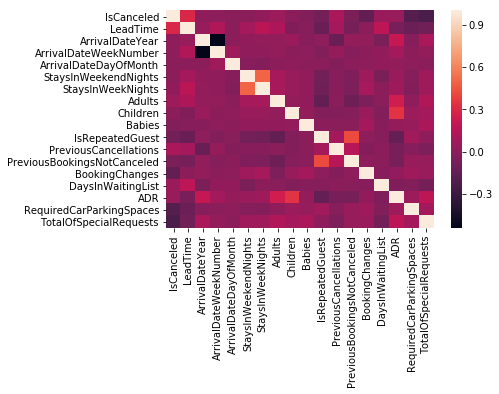

In [91]:
sns.heatmap(data.corr())

In [92]:
data_new_feat = data.copy()

#### Create full Arrival date column

In [93]:
dict_month = {v: k for k,v in enumerate(calendar.month_name)}

data_new_feat['Arrival_Date_MonthN'] = [dict_month[month] for month in data_new_feat.ArrivalDateMonth]

In [94]:
data_new_feat['ArrivalDateFull'] = pd.to_datetime(dict(year=data_new_feat.ArrivalDateYear, 
                                                       month=data_new_feat.Arrival_Date_MonthN, 
                                                       day=data_new_feat.ArrivalDateDayOfMonth))

In [95]:
data_new_feat.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel,Arrival_Date_MonthN,ArrivalDateFull
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1,7,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1,7,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1,7,2015-07-01
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1,7,2015-07-01
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1,7,2015-07-01


#### Booking cancellation ratio per hotel per month

### Feature engineering

- Add features regarding both hotels (city vs resort etc)

### Building model

### Quick simulation for Linear regression

In [41]:
y = df["IsCanceled"]

In [42]:
df['IsCanceled'].dtype == 'int64'

num = []
cat = []
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        num.append(col)
    else:
        cat.append(col)

In [43]:
cat = ['ArrivalDateMonth',
 'Meal',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'CustomerType']

In [44]:
n = 12
print(cat[n])
df[cat[n]]

IndexError: list index out of range

In [45]:
num = ['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

In [46]:
ml = [df[col] for col in num] + [pd.get_dummies(df[col]) for col in cat]
df_ml = pd.concat(ml, axis=1)

In [47]:
len(df_ml.columns)

76

In [48]:
n = 35000

y_train = df["IsCanceled"].iloc[0:n]
X_train = df_ml.iloc[0:n] 

y_test = df["IsCanceled"].iloc[n:]
X_test = df_ml.iloc[n:] 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df_ml.columns

lr = LogisticRegression()
rf = RandomForestClassifier()
#lr.fit(X_train,y_train)
rf.fit(X_train,y_train)

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
from sklearn.metrics import confusion_matrix


In [51]:
pred = rf.predict(X_test)

confusion_matrix(y_test, pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
df['IsCanceled'].value_counts(normalize=True)